# Wind Speed Analysis

In [37]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Load the dataset
file_path = r'C:\Users\owenc\Desktop\PFDA_Project\belmullet_wind_speed_dataset.csv'
data = pd.read_csv(file_path, skiprows=23)

C:\Users\owenc\AppData\Local\Temp\ipykernel_13360\484207137.py:3: DtypeWarning: Columns (12,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, skiprows=23)


In [39]:
# Clean and prepare the data
data = data.rename(columns={
    'date': 'datetime',
    'rain': 'rainfall',
    'temp': 'temperature',
    'wetb': 'wet_bulb_temp',
    'dewpt': 'dew_point',
    'vappr': 'vapor_pressure',
    'rhum': 'relative_humidity',
    'wdsp': 'wind_speed',
    'wddir': 'wind_direction',
    'sun': 'sunshine_duration',
    'vis': 'visibility',
    'clht': 'cloud_height',
    'clamt': 'cloud_amount'
})

In [40]:
columns_to_keep = [
    'datetime', 'rainfall', 'temperature', 'wet_bulb_temp', 'dew_point',
    'vapor_pressure', 'relative_humidity', 'wind_speed', 'wind_direction',
    'sunshine_duration', 'visibility', 'cloud_height', 'cloud_amount'
]

In [41]:
data_cleaned = data[columns_to_keep]
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'], errors='coerce', dayfirst=True)
data_cleaned['wind_speed'] = pd.to_numeric(data_cleaned['wind_speed'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['wind_speed'])

C:\Users\owenc\AppData\Local\Temp\ipykernel_13360\2286689376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'], errors='coerce', dayfirst=True)
C:\Users\owenc\AppData\Local\Temp\ipykernel_13360\2286689376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'], errors='coerce', dayfirst=True)
C:\Users\owenc\AppData\Local\Temp\ipykernel_13360\2286689376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [42]:
# Add a month column for grouping
data_cleaned['month'] = data_cleaned['datetime'].dt.month

In [43]:
# Summary statistics
summary_stats = data_cleaned[['wind_speed', 'temperature', 'rainfall']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
          wind_speed    temperature       rainfall
count  597897.000000  597897.000000  597897.000000
mean       12.704011      10.205105       0.136992
std         6.985753       4.043475       0.485755
min         0.000000      -7.300000       0.000000
25%         8.000000       7.500000       0.000000
50%        12.000000      10.300000       0.000000
75%        17.000000      13.200000       0.000000
max        63.000000      28.200000      25.900000


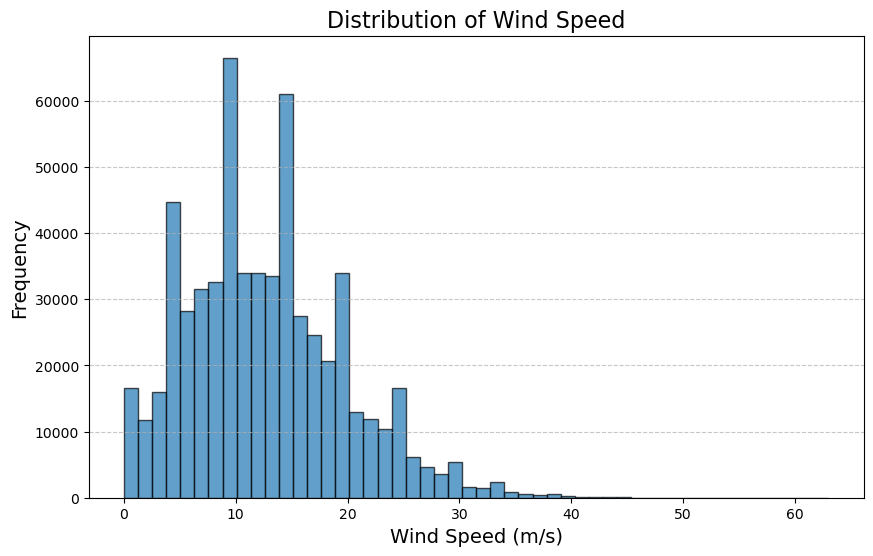

In [44]:
# Plot the distribution of wind speed
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['wind_speed'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [45]:
# Aggregate wind speed data to daily averages
daily_avg_wind_speed = data_cleaned.resample('D', on='datetime')['wind_speed'].mean()


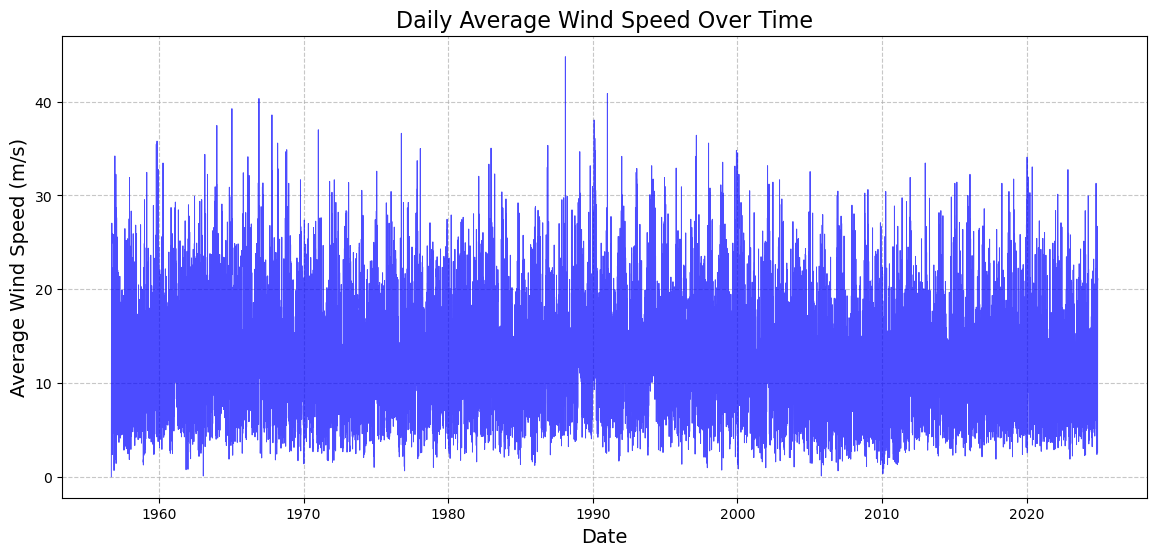

In [46]:
# Time-series plot of daily average wind speed
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_wind_speed.index, daily_avg_wind_speed, alpha=0.7, linewidth=0.7, color='blue')
plt.title('Daily Average Wind Speed Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Wind Speed (m/s)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [47]:
# Monthly average wind speed
monthly_avg_wind_speed = data_cleaned.groupby('month')['wind_speed'].mean()

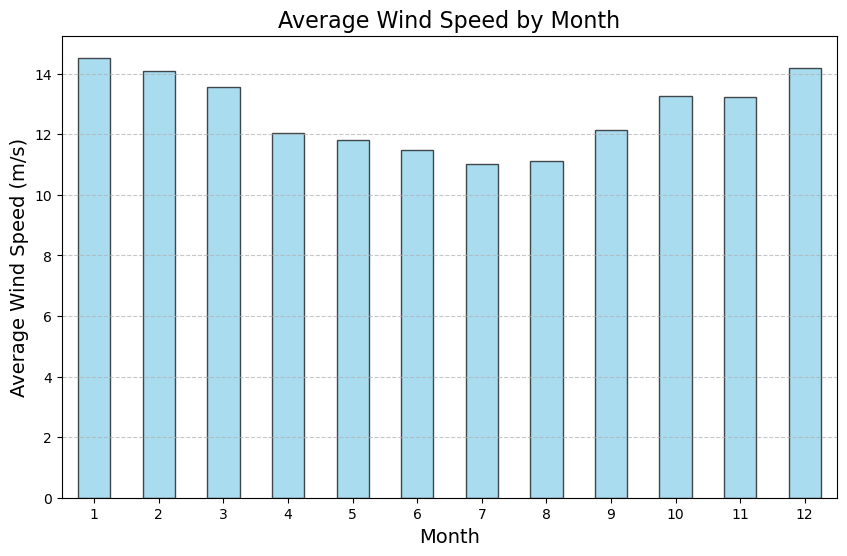

In [48]:
plt.figure(figsize=(10, 6))
monthly_avg_wind_speed.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Wind Speed by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Wind Speed (m/s)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

# End